#  <p style="color:Red">Credit Card Fraud Detection With Isolation Forest

Using Isolation Forest to Predict Fraudulent Transaction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import os
import sys
import time
import json
from IPython.display import display
from time import strftime, gmtime
import seaborn as sns

In [2]:
# Data
credit_df = pd.read_csv('/home/ritesh/Documents/Project/creditcard.csv')
credit_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
credit_df.shape

(284807, 31)

# Exploratory Data Analysis

In [4]:
# Summary
credit_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
#Checking the balance of the data

print("The number of Non-Frauds are: ",str(credit_df["Class"].value_counts()[0])+ "which is ", round(credit_df["Class"].value_counts()[0]/len(credit_df)*100,2),"% of the dataset")

print("The number of Frauds are: ",str(credit_df["Class"].value_counts()[1])+ "which is ", round(credit_df["Class"].value_counts()[1]/len(credit_df)*100,2),"% of the dataset")


The number of Non-Frauds are:  284315which is  99.83 % of the dataset
The number of Frauds are:  492which is  0.17 % of the dataset


In [6]:
fraud = credit_df[credit_df['Class'] == 1]
non_fraud = credit_df[credit_df['Class'] == 0]

outlier_fraction = len(fraud) / float(len(non_fraud))
print(outlier_fraction)

0.0017304750013189597


/home/ritesh/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Class', ylabel='count'>

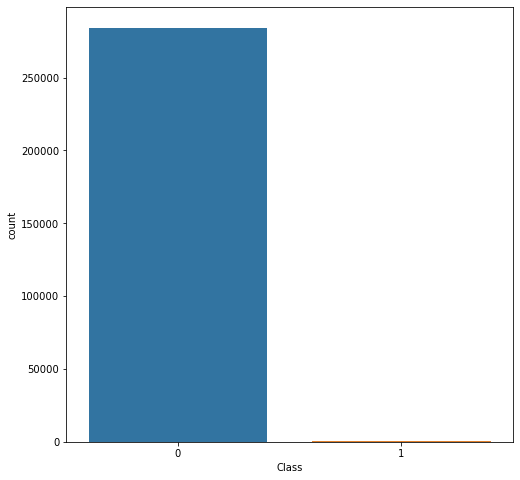

In [7]:
# Plot the class distribution
plt.figure(figsize = (8,8))
sns.countplot("Class",data=credit_df)

In [8]:
# Checking the missing data
credit_df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

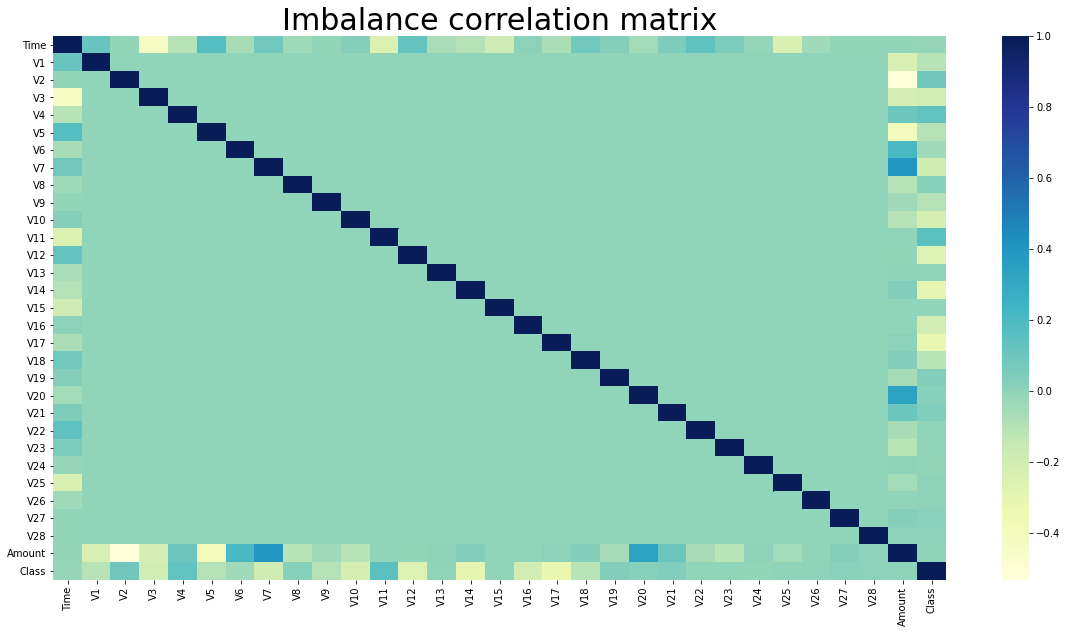

In [9]:
# Feature correlation
fig,ax = plt.subplots(figsize =(20,10))

# Imbalance DataFrame Correlation
corr = credit_df.corr()
sns.heatmap(corr,cmap="YlGnBu",annot_kws={"size":30},ax=ax)
ax.set_title("Imbalance correlation matrix",fontsize=30)
plt.show()

# Feature Engineering

1- Scale the features that needs scaling.

2- Fix the target feature imbalance problem.

3- Detect and Remove Outliers.

4- Split the data to train, validation and test.



/home/ritesh/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ritesh/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Amount')

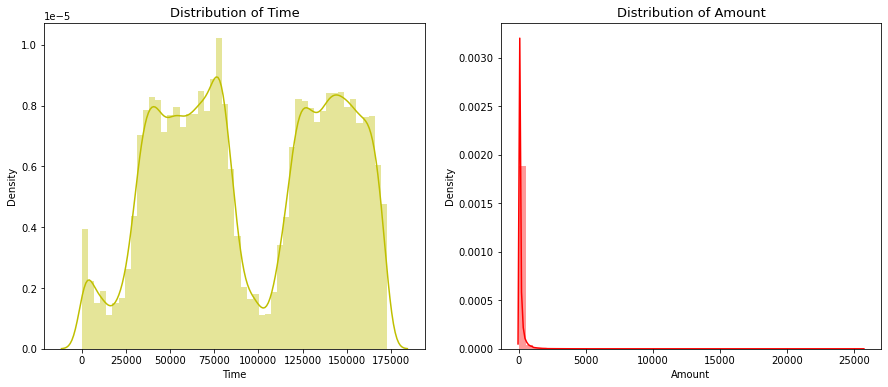

In [10]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax1 = sns.distplot(credit_df['Time'], ax=ax1, color='y')
ax2 = sns.distplot(credit_df['Amount'], ax=ax2, color='r')
ax1.set_title('Distribution of Time', fontsize=13)
ax2.set_title('Distribution of Amount', fontsize=13)

<font size="2" font>To normalize the distribution we are going to use a method called Feature Scaling. In our case it is better to use the Robust Scaler algorithm because it's robust to outliers

In [11]:
# 1. Fixing the feature scaling problem for (Time and Amount)

from sklearn.preprocessing import RobustScaler

credit_df["scaled_amount"] = RobustScaler().fit_transform(credit_df["Amount"].values.reshape(-1,1))

credit_df["scaled_time"] = RobustScaler().fit_transform(credit_df["Time"].values.reshape(-1,1))

credit_df.drop(["Time","Amount"],axis=1,inplace=True)

In [12]:
scaled_amount = credit_df['scaled_amount']
scaled_time = credit_df['scaled_time']
credit_df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
credit_df.insert(0, 'scaled_amount', scaled_amount)
credit_df.insert(0, 'scaled_time', scaled_time)
credit_df.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.994983,1.783274,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.994983,-0.269825,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-0.994972,4.983721,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.994972,1.418291,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.994960,0.670579,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [13]:
credit_df.describe()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,284807.000000,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,0.118914,0.927124,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,...,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,0.001727
std,0.557903,3.495006,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527
min,-0.994983,-0.307413,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,-0.358210,-0.229162,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000
50%,0.000000,0.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000
75%,0.641790,0.770838,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000
max,1.035022,358.683155,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000


 We can see that:
    
    > time_after scaling appears to be quite evenly distributed and scaled with min and max values are within range of the others features.
    
    > amount after scaling  transaction amount values are also associated within the range of the other features with min of -0.307 and max of 358.68

# Model Building

# <p style="color:blue">1. Logistic Regression without SMOTE

In [14]:
#from sklearn.model_selection import train_test_split
#x = np.array(credit_df.iloc[:,credit_df.columns!="Class"])
#y = np.array(credit_df.iloc[:,credit_df.columns=="Class"])
#x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [15]:
x = credit_df.drop("Class",axis = 1) # X is input
y = credit_df["Class"] # y is output

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

/home/ritesh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

   Non-fraud       1.00      1.00      1.00     56861
       Fraud       0.88      0.63      0.74       101

    accuracy                           1.00     56962
   macro avg       0.94      0.82      0.87     56962
weighted avg       1.00      1.00      1.00     56962



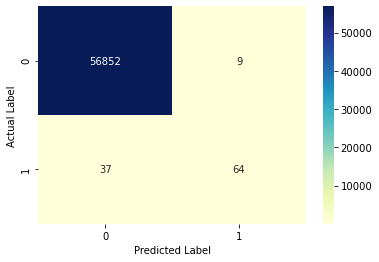

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,precision_recall_curve,classification_report,precision_score,accuracy_score
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)
cnf_matrix = confusion_matrix(y_test,y_pred)

sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap="YlGnBu",fmt="g")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")

labels = ["Non-fraud","Fraud"]
print(classification_report(y_test,y_pred,target_names=labels))

 As we can see this is not a good model, because it is biased towards majority class and the recall in minority class is not as high as disired

Text(0.5, 1.0, 'Precision Recall Curve')

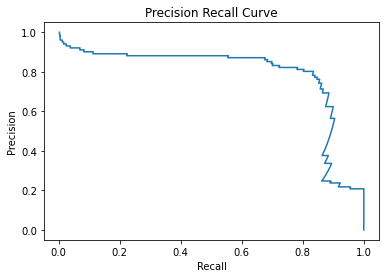

In [17]:
y_pred_prob = logreg.predict_proba(x_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')

In [18]:
from imblearn.over_sampling import SMOTE

In [19]:
print("Transaction Number x_train dataset:",x_train.shape)
print("Transaction Number y_train dataset:", y_train.shape)
print("Transaction Number x_test dataset: ", x_test.shape)
print("Transaction Number y_test dataset: ", y_test.shape)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

print("Before OverSampling, counts of label '1': {} \n".format(sum(y_test==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_test==0)))

Transaction Number x_train dataset: (227845, 30)
Transaction Number y_train dataset: (227845,)
Transaction Number x_test dataset:  (56962, 30)
Transaction Number y_test dataset:  (56962,)
Before OverSampling, counts of label '1': 391
Before OverSampling, counts of label '0': 227454 

Before OverSampling, counts of label '1': 101 

Before OverSampling, counts of label '0': 56861 



After OverSampling, the shape of train_x: (454908, 30)
After OverSampling, the shape of train_y: (454908,) 

After OverSampling, counts of label '1', %: 50.0
After OverSampling, counts of label '0', %: 50.0


<AxesSubplot:ylabel='count'>

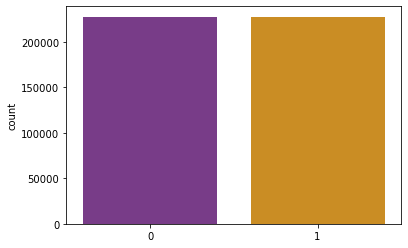

In [20]:
sm = SMOTE(random_state=2)
x_train_s,y_train_s = sm.fit_sample(x_train,y_train.ravel())

print('After OverSampling, the shape of train_x: {}'.format(x_train_s.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_s.shape))

print("After OverSampling, counts of label '1', %: {}".format(sum(y_train_s==1)/len(y_train_s)*100.0,2))
print("After OverSampling, counts of label '0', %: {}".format(sum(y_train_s==0)/len(y_train_s)*100.0,2))

sns.countplot(x=y_train_s,data = credit_df,palette="CMRmap")

<font size="2" font>Now the dataset is balanced, so we can build a Logistic Regression model with SMOTE. One important thing to point out here is that we used SMOTE after cross validation in order to avoid data leakage problem and hence overfitting

# <p style="color:Green"> Logistic Regression with SMOTE

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56861
           1       0.06      0.94      0.12       101

    accuracy                           0.98     56962
   macro avg       0.53      0.96      0.55     56962
weighted avg       1.00      0.98      0.99     56962



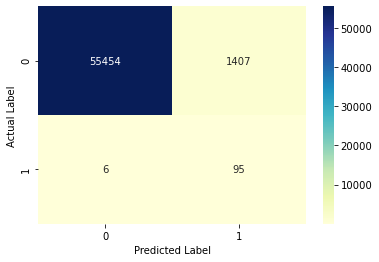

In [21]:
logreg = LogisticRegression()
logreg.fit(x_train_s,y_train_s)
y_pred = logreg.predict(x_test)
cnf_matrix = confusion_matrix(y_test,y_pred)

sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap="YlGnBu",fmt ="g")
plt.ylabel('Actual Label')
plt.xlabel("Predicted Label")
print(classification_report(y_test,y_pred))

Text(0.5, 1.0, 'Precision Recall Curve')

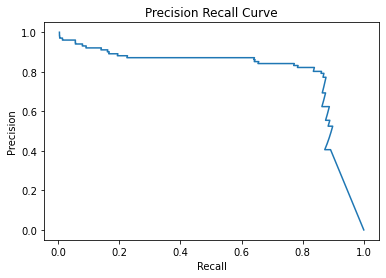

In [22]:
y_pred_prob = logreg.predict_proba(x_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')

<font size="2" font>We got a high recall which means our model is able to detect the highest number of fraud transactions, while the precision is very low which is not good because it means that the model classifies a lot of non-fraud transactions as fraud. The customers of a financial institution are not going to be satisfied with that fact and may even stop using the service of that financial institution. So in this case it's also important to have a high precision, which we are going to try to achieve with Random Forest

# <p style="color:red">2. Random Forest Classifier with SMOTE

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.89      0.83      0.86       101

    accuracy                           1.00     56962
   macro avg       0.95      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962



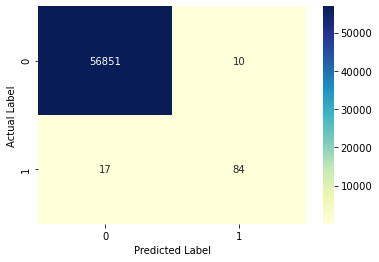

In [23]:
from sklearn.ensemble import RandomForestClassifier as rfc
rand_f = rfc(n_estimators=100,min_samples_split=10,min_samples_leaf=1,
             max_features="auto",max_leaf_nodes=None,oob_score=True,n_jobs=-1,
             random_state=1)
rand_f.fit(x_train_s,y_train_s)
y_pred = rand_f.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap="YlGnBu",fmt="g")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
print(classification_report(y_test,y_pred))

Text(0.5, 1.0, 'Precision Recall Curve')

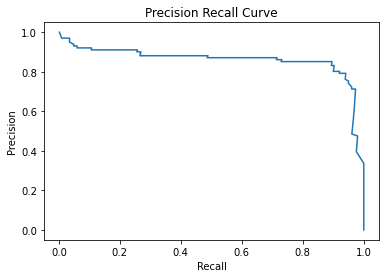

In [24]:
from sklearn.metrics import precision_recall_curve
y_pred_prob = rand_f.predict_proba(x_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(precision,recall)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall Curve")

<font size="2" font> So Random Forest with SMOTE performed better than Logistic Regression overall allowing us to get high recall and high precision at the same time. Even though the recall has decreased a little bit, we were able to increase the precision significantly, which means a lot in the case of fraud detection and as we know it is a trade-off

Feature importance ranking


1.V14(0.190526)
2.V10(0.144783)
3.V4(0.099620)
4.V17(0.096338)
5.V12(0.072536)
6.V11(0.053420)
7.V3(0.052750)
8.V16(0.039229)
9.V7(0.027471)
10.V18(0.025451)
11.V2(0.021228)
12.V9(0.018420)
13.V8(0.014879)
14.V5(0.014600)
15.V27(0.014457)
16.V6(0.013137)
17.V1(0.010668)
18.V21(0.009976)
19.scaled_amount(0.009944)
20.V19(0.008844)
21.V13(0.008736)
22.V20(0.007978)
23.scaled_time(0.006582)
24.V28(0.006511)
25.V25(0.005641)
26.V26(0.005598)
27.V23(0.005561)
28.V15(0.005521)
29.V24(0.004878)
30.V22(0.004717)


<BarContainer object of 30 artists>

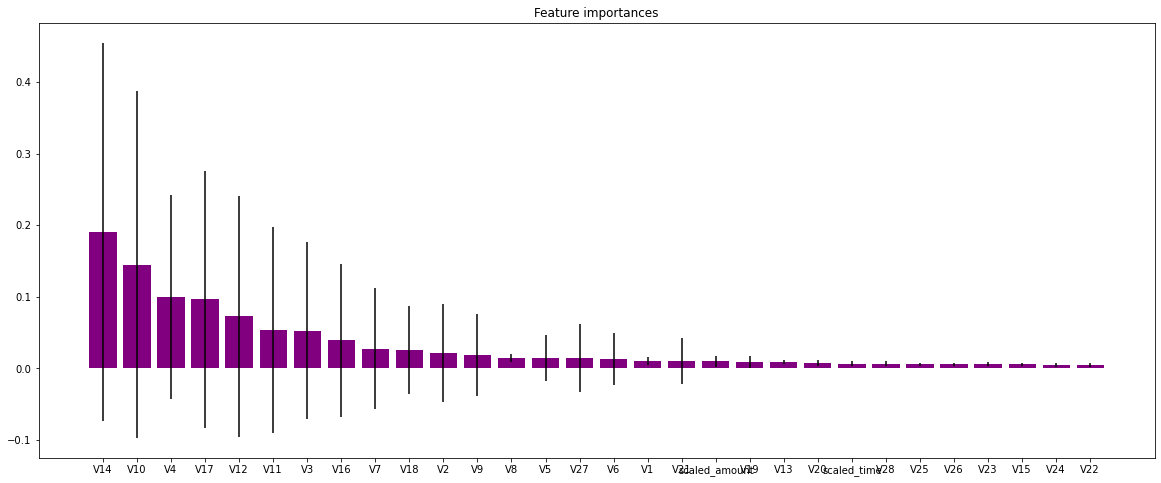

In [25]:
#Plotting Feature Importances
print('Feature importance ranking\n\n')
importances = rand_f.feature_importances_
std = np.std([tree.feature_importances_ for tree in rand_f.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
variables = credit_df.columns
importance_list = []
for f in range(x.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))
plt.figure(figsize=(20, 8))
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],
       color="purple", yerr=std[indices], align='center')

# <p style="color:purple">3. XGBoost with SMOTE

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.41      0.82      0.55       101

    accuracy                           1.00     56962
   macro avg       0.71      0.91      0.77     56962
weighted avg       1.00      1.00      1.00     56962



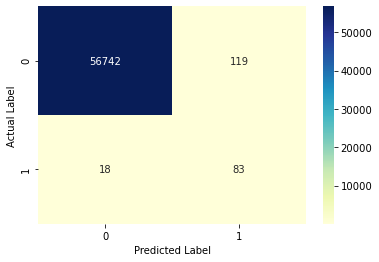

In [26]:
import xgboost as xgb
model = xgb.XGBClassifier(n_estimators = 50, max_depth = 30, learning_rate = 0.01)
model.fit(x_train_s, y_train_s)
y_pred = model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print(classification_report(y_test,y_pred))

#  <p style="color:orange">4. Neural Network with SMOTE

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential([Dense(input_dim=30,units=16,activation="relu"),
                   Dropout(0.5),
                    Dense(units=20,activation="relu"),
                    Dense(units=24,activation="relu"),
                    Dense(units=1,activation="sigmoid")])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                496       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                340       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 1,365
Trainable params: 1,365
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
model.fit(x_train_s,y_train_s,batch_size=15,epochs=15)

Epoch 1/15
30328/30328 [==============================] - 29s 972us/step - loss: 0.0933 - accuracy: 0.9587
Epoch 2/15
30328/30328 [==============================] - 35s 1ms/step - loss: 0.0702 - accuracy: 0.9683
Epoch 3/15
30328/30328 [==============================] - 30s 1ms/step - loss: 0.0675 - accuracy: 0.9694
Epoch 4/15
30328/30328 [==============================] - 31s 1ms/step - loss: 0.0654 - accuracy: 0.9702
Epoch 5/15
30328/30328 [==============================] - 32s 1ms/step - loss: 0.0634 - accuracy: 0.9715
Epoch 6/15
30328/30328 [==============================] - 37s 1ms/step - loss: 0.0624 - accuracy: 0.9715
Epoch 7/15
30328/30328 [==============================] - 38s 1ms/step - loss: 0.0616 - accuracy: 0.9718
Epoch 8/15
30328/30328 [==============================] - 41s 1ms/step - loss: 0.0607 - accuracy: 0.9725
Epoch 9/15
30328/30328 [==============================] - 41s 1ms/step - loss: 0.0591 - accuracy: 0.9731
Epoch 10/15
30328/30328 [============================

<AxesSubplot:>

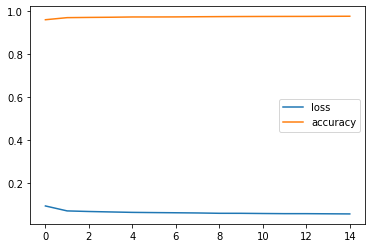

In [29]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [30]:
score = model.evaluate(x_test,y_test)
print(score)

1781/1781 [==============================] - 2s 1ms/step - loss: 0.0095 - accuracy: 0.9985
[0.009529819712042809, 0.9984902143478394]


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.55      0.85      0.67       101

    accuracy                           1.00     56962
   macro avg       0.77      0.93      0.83     56962
weighted avg       1.00      1.00      1.00     56962



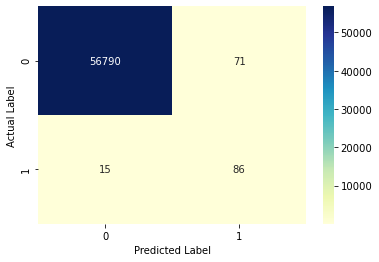

In [31]:
y_pred = model.predict_classes(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

print(classification_report(y_test, y_pred))

# <p style="color:Green"> Isolation Forest and Local Outliers Factors

In [32]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

In [33]:
classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(x), 
                                       contamination=outlier_fraction,random_state=1, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05,max_iter=-1)
   
}

In [34]:
type(classifiers)

dict

In [35]:
n_outliers = len(fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(x)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(x)
        y_pred = clf.predict(x)
    else:    
        clf.fit(x)
        scores_prediction = clf.decision_function(x)
        y_pred = clf.predict(x)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(y,y_pred))
    print("Classification Report :")
    print(classification_report(y,y_pred))

Isolation Forest: 663
Accuracy Score :
0.9976721077782499
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.33      0.33      0.33       492

    accuracy                           1.00    284807
   macro avg       0.66      0.66      0.66    284807
weighted avg       1.00      1.00      1.00    284807

Local Outlier Factor: 985
Accuracy Score :
0.9965415175891043
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.00      0.00      0.00       492

    accuracy                           1.00    284807
   macro avg       0.50      0.50      0.50    284807
weighted avg       1.00      1.00      1.00    284807

Support Vector Machine: 13942
Accuracy Score :
0.9510475514997876
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.95